# Classifier

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

#Machine learning packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Packages to create DFM
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Packages for cross-validation and parameter tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#Packages for getting model performance metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [3]:
data = pd.read_csv('data_danish.csv', index_col=False)
data.head(3)

,actor,tweet,date,retweet,date_convert,@mentions,#hashtags,emojis,clean_text,language,words,without_stopwords,lemmas,proc_text,bigrams,proc_text_all
0,PlanBornefonden,"13-årige Larissa bor i Sahel-regionen, og var ...",2021-05-14 09:03:00,NaN,2021-05-14 00:00:00,NaN,NaN,,årige larissa bor i sahelregionen og var i tvu...,da,"['årige', 'larissa', 'bor', 'i', 'sahelregione...","['årige', 'larissa', 'bor', 'sahelregionen', '...","['årig', 'larissa', 'bor', 'sahelregion', 'tvi...",årig larissa bor sahelregion tvinge flygte lan...,"['årig_larissa', 'larissa_bor', 'bor_sahelregi...",årig larissa bor sahelregion tvinge flygte lan...
1,PlanBornefonden,Vi ønsker alle muslimer en god Eid i aften! Ei...,2021-05-12 14:00:02,NaN,2021-05-12 00:00:00,NaN,NaN,,vi ønsker alle muslimer en god eid i aften eid...,da,"['vi', 'ønsker', 'alle', 'muslimer', 'en', 'go...","['ønsker', 'muslimer', 'god', 'eid', 'aften', ...","['ønske', 'muslim', 'god', 'eid', 'aften', 'ei...",ønske muslim god eid aften eid mubarak,"['ønske_muslim', 'muslim_god', 'god_eid', 'eid...",ønske muslim god eid aften eid mubarak ønske_m...
2,PlanBornefonden,Kom til samtalekøkken med @BosseStine og @Clau...,2021-05-12 11:58:03,@dorthe10,2021-05-12 00:00:00,"['BosseStine, ClausMeyerDK']",dkfood,,kom til samtalekøkken med og den maj og spis e...,da,"['kom', 'til', 'samtalekøkken', 'med', 'og', '...","['kom', 'samtalekøkken', 'maj', 'spis', 'lække...","['komme', 'samtalekøkken', 'maj', 'spise', 'læ...",komme samtalekøkken maj spise lækker ret menu ...,"['komme_samtalekøkken', 'samtalekøkken_maj', '...",komme samtalekøkken maj spise lækker ret menu ...


In [4]:
data.proc_text_all[2]

'komme samtalekøkken maj spise lækker ret menu græskinspirere men klog kvindelighed kærlighed penge magte komme_samtalekøkken samtalekøkken_maj maj_spise spise_lækker lækker_ret ret_menu menu_græskinspirere græskinspirere_men men_klog klog_kvindelighed kvindelighed_kærlighed kærlighed_penge penge_magte dkfood '

In [3]:
#use proc_text_all 
critism_string = 'kalder  had_forbryder  forskel  regeringen  samme  mattiastesfaye  mattias tesfaye  politikere  ansvar  imod  ytringsfrihed  eu  no_go  racisme  stiger  uretfærdig  uretfærdigt  dumt  frigive  længe  nej  rige_lande  regeringens  umenneskelige  flygtningepolitik  pres  argumenter  smide  arbejdsløshed  drop  virker  stoppe  krise  kræver  samarbejde  træde  vigtigt  lover  lovet  danmark  klimakrisen  svigte  svigter  opråb  opråbet  verdens  fattigste  verden  fattige  svigt  mindre  skuffende  skuffe  vente  retfærdighed  nu  nwammen  wammen  minde  tid  fuldstændig  regeringdk  dk  spørge  spørger  rammer  nedskæring  tiden  uacceptabel  ret  lovgivning  kvindeundertrykkelse  menneskerettigheder  respekt  opfordrer  imod  ulovlige  står  sag  rapport  kræver  politisk  stop  mod  vold  psykiske  tænk  mens  ikke  også  klart  forpligtelse  anbefaling  i_gang  komme  grøn  retfærdighed  diskrimination  handlingsplan  ulighed  solidaritet  tiltrængt  udfordringer  anbefale  vigtigt  beskytte  udspil  bedre  beskyttelse  alle  understreger  takker  opråb  flygtninge  dansk  kæmpe  klare  udsætte  handle  afgøre  øge  styrke  demokrati  forpligtelse  bidrage  politiske  partier  egentlig  tør  opfordre   forkert  kritik  kritisere  kritiserer  dybt  problematisk  problem  problematiske  retfærdigt  appel  kummerlige  konsekvenser  uansvarligt  usolidarisk  uhensigtsmæssigt  ansvar  burde  statsministeren  misbruge  misbruger  bør  stoppe  ligestilling   argumenter  eksperter  stat  lejrene  udlændingestyrelsen  diskrimination  kønsdiskrimination  gribe' 
human_string = 'yde  assistance  engagement  forandringer  indsatser  udvikling  arbejde  civilsamfundsudvikling  støtte  borgerforslag  tak  støttes  underskriftindsamling  arrangerer  samarbejde  aktivisme  stå  stod  afstand  klimamarch  march  endelig  bannere  gaden  kræve  klimapolitik  begivenhed  sammen  fælles  akut  behov  humanitære  sender  hjælpe  sende  lokale  partnere  gøre  lytte  lyttes  handling  handle  møde  opsatte  opsat  hjulpet  fokus  ekstra  hvordan  massiv  indsats  oplysning  fået  få  vigtigheden  rådighed  stiller  stille  udsatte  tværgående  fremtid  glad  meget  give  giver  mennesker  frivillige  stor  stort  tak  udtryk  omsorg  forstå  forstået  behov  mærke  mærker  liv  børn  unge  ydmygt  ønske  alene  opleve  oplever  samfundsopgave  tanker  trist  bekymrende  andre  ikke  oplevelse  oplevelser  skole  nemt  hjælpe  hjælper  fortjent  fortjene  børnene  opmærksom  opmærksomme  opmærksomhed  ord  anderledes  gjort  plejer  følelser  føle  føler  sult  hungersnød  fattige  menneske  flygtede  nød  hjælp  barn  pige  vigtig  ung  sikre  bruge  give  sårbar  sårbare  skrøbeligt  sundhedssystem  ekstremt  svage  mistet  hjælpearbejde  parat  førstehjælp  ofre  sjæl  smerten  smerte  traume  traumatiserede  flygte  mangler  bremse  bistand  vand  rent  familie  familier  forsørge  hjerte  hjertet  fortalte  situation  fantastisk  foruroligende  syg'

In [4]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

critism = tknzr.tokenize(critism_string)
human = tknzr.tokenize(human_string)

In [5]:
len(data)*0.2

1889.8000000000002

In [6]:
list_of_tokens = []
for string in data['proc_text_all']:
    item = tknzr.tokenize(string)
    list_of_tokens.append(item)

data['tokens'] = list_of_tokens

In [7]:
#count how many words find in the respective lists 

critism_n = []
for words in data['tokens']: #this shall be tokens 
    i = 0
    for token in words:
        if token in critism:
            i += 1 
    critism_n.append(i)

data['critism'] = critism_n

#If equal number of words, drop 
human_n = []
for words in data['tokens']: #this shall be tokens 
    i = 0
    for token in words:
        if token in human:
            i += 1 
    human_n.append(i)

data['human'] = human_n
    

In [8]:
data.head(2)

,actor,tweet,date,retweet,date_convert,@mentions,#hashtags,emojis,clean_text,language,words,without_stopwords,lemmas,proc_text,bigrams,proc_text_all,tokens,critism,human
0,PlanBornefonden,"13-årige Larissa bor i Sahel-regionen, og var ...",2021-05-14 09:03:00,NaN,2021-05-14 00:00:00,NaN,NaN,,årige larissa bor i sahelregionen og var i tvu...,da,"['årige', 'larissa', 'bor', 'i', 'sahelregione...","['årige', 'larissa', 'bor', 'sahelregionen', '...","['årig', 'larissa', 'bor', 'sahelregion', 'tvi...",årig larissa bor sahelregion tvinge flygte lan...,"['årig_larissa', 'larissa_bor', 'bor_sahelregi...",årig larissa bor sahelregion tvinge flygte lan...,"[årig, larissa, bor, sahelregion, tvinge, flyg...",0,3
1,PlanBornefonden,Vi ønsker alle muslimer en god Eid i aften! Ei...,2021-05-12 14:00:02,NaN,2021-05-12 00:00:00,NaN,NaN,,vi ønsker alle muslimer en god eid i aften eid...,da,"['vi', 'ønsker', 'alle', 'muslimer', 'en', 'go...","['ønsker', 'muslimer', 'god', 'eid', 'aften', ...","['ønske', 'muslim', 'god', 'eid', 'aften', 'ei...",ønske muslim god eid aften eid mubarak,"['ønske_muslim', 'muslim_god', 'god_eid', 'eid...",ønske muslim god eid aften eid mubarak ønske_m...,"[ønske, muslim, god, eid, aften, eid, mubarak,...",0,1


In [9]:
#Has the tweets most words from human or critism? Or equal number of words

class_type = []

for i, row in data.iterrows():
    if row.critism > row.human:
        class_type.append('critism')
    elif row.human > row.critism:
        class_type.append('human')
    else:
        class_type.append('equal')

data['class'] = class_type


In [10]:
data['class_type'] = data['class'].apply(lambda x: 1 if x == 'critism' else 0)


#Creating a test dataset 
unlabeled = data.sample(n = round((len(data)*0.1)), axis = 0)
unlabeled = unlabeled.reset_index(drop=True)

#creating test dataset 
labeled = data
labeled = data.drop(unlabeled.index, axis=0)

print('Shape of labeled dataset:',labeled.shape,
      '\nShape of unlabeled dataset:',unlabeled.shape)

Shape of labeled dataset: (8504, 21) 
Shape of unlabeled dataset: (945, 21)


In [11]:
#If equal number of words, drop 
print('Before dropping equal classes:', len(labeled))
labeled = labeled[labeled['class'] != 'equal']

print('After dropping equal classes:', len(labeled))

Before dropping equal classes: 8504
After dropping equal classes: 6476


In [12]:
#Splitting features into X and y
X = labeled['proc_text_all']
y = labeled['class_type'].values

# Supervised Learning: Lasso

In [13]:
#Initializing the pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range = (1,2), max_df = 0.999, min_df = 0.01, tokenizer = tknzr.tokenize)),
    ('tfidf', TfidfTransformer()),
    ('lasso', LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 1000)),
])

In [14]:
#Setting the parameter grid 
parameter_grid = {
    'tfidf__use_idf': [True, False],
    'lasso__C': [0.05, 0.1, 0.5, 1, 5]}

#Initializing a kfold with 5 folds
cv = StratifiedKFold(n_splits=5)

lasso_search = GridSearchCV(pipeline, parameter_grid, cv=cv, verbose=10)

In [15]:
lasso_result = lasso_search.fit(X, y)

#lasso_result.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START lasso__C=0.05, tfidf__use_idf=True.........................
[CV 1/5; 1/10] END .......lasso__C=0.05, tfidf__use_idf=True; total time=   2.6s
[CV 2/5; 1/10] START lasso__C=0.05, tfidf__use_idf=True.........................
[CV 2/5; 1/10] END .......lasso__C=0.05, tfidf__use_idf=True; total time=   2.1s
[CV 3/5; 1/10] START lasso__C=0.05, tfidf__use_idf=True.........................
[CV 3/5; 1/10] END .......lasso__C=0.05, tfidf__use_idf=True; total time=   2.2s
[CV 4/5; 1/10] START lasso__C=0.05, tfidf__use_idf=True.........................
[CV 4/5; 1/10] END .......lasso__C=0.05, tfidf__use_idf=True; total time=   2.2s
[CV 5/5; 1/10] START lasso__C=0.05, tfidf__use_idf=True.........................
[CV 5/5; 1/10] END .......lasso__C=0.05, tfidf__use_idf=True; total time=   2.1s
[CV 1/5; 2/10] START lasso__C=0.05, tfidf__use_idf=False........................
[CV 1/5; 2/10] END ......lasso__C=0.05, tfidf__u

In [16]:
#Finding the best performing model and saving it 
bestlasso = lasso_result.best_estimator_

print('Here we se the parameters of the best Lasso model:',lasso_result.best_params_,
      '\nAvg. accuracy score of the best performing model:',lasso_result.best_score_)


Here we se the parameters of the best Lasso model: {'lasso__C': 5, 'tfidf__use_idf': False} 
Avg. accuracy score of the best performing model: 0.9581516039849373


In [17]:
#Investigate the difference between using plain frequencies and tf-idf

#Saving the results of all parameters in a dataframe
lasso_result_df = pd.DataFrame(lasso_result.cv_results_)

#Locating and printing the accuracy results of the two vectorizers with the optimal C parameter value
print('Result of best model with tf-idf vectorizing:\t',
      lasso_result_df.loc[(lasso_result_df.param_tfidf__use_idf == True)
                          & (lasso_result_df.param_lasso__C == 5)]['mean_test_score'].values)

print('Result of best model with count vectorizing:\t',
      lasso_result_df.loc[(lasso_result_df.param_tfidf__use_idf == False)
                    & (lasso_result_df.param_lasso__C == 5)]['mean_test_score'].values)


#Here we see that the tf-idf vectorizing performs better than the count vectorizer. 


Result of best model with tf-idf vectorizing:	 [0.9572252]
Result of best model with count vectorizing:	 [0.9581516]


In [18]:
lasso_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__C,param_tfidf__use_idf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.899923,0.157432,0.351921,0.016565,0.05,True,"{'lasso__C': 0.05, 'tfidf__use_idf': True}",0.771605,0.755212,0.753668,0.749035,0.762934,0.758491,0.007939,10
1,1.796812,0.113236,0.360305,0.022778,0.05,False,"{'lasso__C': 0.05, 'tfidf__use_idf': False}",0.790123,0.780695,0.773745,0.772201,0.766023,0.776558,0.008234,9
2,1.755026,0.027815,0.332348,0.028881,0.1,True,"{'lasso__C': 0.1, 'tfidf__use_idf': True}",0.891975,0.849421,0.853282,0.837066,0.830116,0.852372,0.021483,7
3,1.732984,0.021116,0.353035,0.017924,0.1,False,"{'lasso__C': 0.1, 'tfidf__use_idf': False}",0.870370,0.850965,0.849421,0.840154,0.816988,0.845580,0.017351,8
4,1.753875,0.026370,0.358705,0.017523,0.5,True,"{'lasso__C': 0.5, 'tfidf__use_idf': True}",0.966049,0.948263,0.945946,0.955985,0.938996,0.951048,0.009257,5
5,1.807679,0.088731,0.332514,0.028496,0.5,False,"{'lasso__C': 0.5, 'tfidf__use_idf': False}",0.964506,0.945946,0.947490,0.955985,0.932819,0.949349,0.010602,6
6,1.794865,0.041777,0.356022,0.013506,1,True,"{'lasso__C': 1, 'tfidf__use_idf': True}",0.970679,0.958301,0.952896,0.954440,0.945174,0.956298,0.008362,3
7,1.815354,0.061064,0.345132,0.016560,1,False,"{'lasso__C': 1, 'tfidf__use_idf': False}",0.969136,0.956757,0.954440,0.955212,0.944402,0.955989,0.007883,4
8,2.664473,0.138621,0.350346,0.018049,5,True,"{'lasso__C': 5, 'tfidf__use_idf': True}",0.966821,0.956757,0.950579,0.956757,0.955212,0.957225,0.005305,2
9,2.769078,0.105106,0.344397,0.014190,5,False,"{'lasso__C': 5, 'tfidf__use_idf': False}",0.968364,0.955985,0.952896,0.957529,0.955985,0.958152,0.005324,1


In [19]:
#drop words from proc_text_all which are in our classifier lists 
unlabeled['tokens_without_class'] = [[word for word in words
                                      if word not in human + critism]
                                     for words in unlabeled["tokens"]]

unlabeled['text_w_class'] = unlabeled['tokens_without_class'].apply(
                     lambda x: " ".join( x))
#unlabeled['tokens_without_class']  = [word for word in unlabeled['tokens'] if word not in human ]
#result = ' '.join(resultwords)

#print(result)

In [20]:
print(len(unlabeled.tokens[1]))
print(len(unlabeled.tokens_without_class[1]))
#unlabeled.head()

47
41


Accuracy and confusion matrix for best Lasso
0.8719576719576719


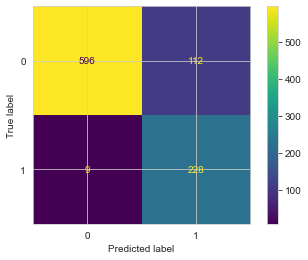

In [38]:
#Splitting unlabeled features into X and y

Xnew = unlabeled['proc_text_all']
#Xnew = unlabeled['text_w_class']
ynew = unlabeled['class_type'].values


print('Accuracy and confusion matrix for best Lasso')

#Fitting the best model with the labeled dataset
bestlasso.fit(X, y)

#Getting the accuracy score
print(bestlasso.score(Xnew, ynew))

#Confusion matrix Lasso 
plot_confusion_matrix(bestlasso, Xnew, ynew) 
plt.show()
#plt.savefig('Accuracy and confusion matrix for best Lasso.png')

In [22]:
#Getting predicted values with Lasso
ypred = bestlasso.predict(Xnew)

#Getting classification report for Lasso
print(classification_report(ypred,ynew))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       605
           1       0.96      0.67      0.79       340

    accuracy                           0.87       945
   macro avg       0.90      0.83      0.85       945
weighted avg       0.89      0.87      0.87       945



In [23]:
#Repeating above steps for Lasso 

n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()

probs = bestlasso.predict_proba(Xnew)

for i in range(n_classes):
    fpr[i], tpr[i], threshold = roc_curve(ynew, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    

In [24]:
human_pred = []
critism_pred = []
for element in probs:
    human_pred.append(element[0])
    critism_pred.append(element[1])
    

In [25]:
unlabeled['human_pred'] = human_pred
unlabeled['critism_pred'] = critism_pred

<AxesSubplot:xlabel='actor'>

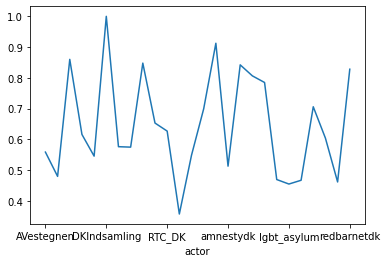

In [26]:
unlabeled.groupby('actor')['human_pred'].mean().plot()

In [27]:
critism_p = unlabeled.groupby('actor')['critism_pred'].mean()
human_p = unlabeled.groupby('actor')['human_pred'].mean()
print("critism predictions:", unlabeled.groupby('actor')['critism_pred'].mean())
print("human predictions:", unlabeled.groupby('actor')['human_pred'].mean())

critism predictions: actor
AVestegnen         4.409537e-01
ActionAidDK        5.198059e-01
BornsVilkar        1.397510e-01
CARE_Danmark       3.835960e-01
CaritasDanmark     4.540559e-01
DKIndsamling       8.099859e-08
DRC_dk             4.233679e-01
DignityDK          4.248262e-01
MissionEast        1.519270e-01
PlanBornefonden    3.465678e-01
RTC_DK             3.727310e-01
RefWelcome         6.420300e-01
UNDP_Danmark       4.511161e-01
UNICEFDK           3.003533e-01
WFP_DK             8.742074e-02
amnestydk          4.866119e-01
blaakorsdanmark    1.576154e-01
danmissiondk       1.933438e-01
danskrodekors      2.148505e-01
globaltfokus       5.300567e-01
lgbt_asylum        5.446839e-01
menneskeret        5.324441e-01
msf_dk             2.936944e-01
noedhjaelp         3.957100e-01
oxfamibis          5.379452e-01
redbarnetdk        1.717436e-01
Name: critism_pred, dtype: float64
human predictions: actor
AVestegnen         0.559046
ActionAidDK        0.480194
BornsVilkar        0.8602

0.4409537033272377

In [56]:
human_p2 = 1 + 0 * critism_p

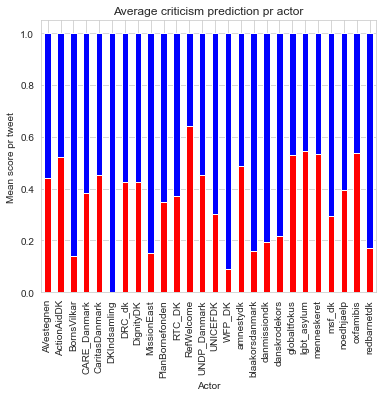

In [59]:
human_p2.plot(kind='bar', title='Average criticism prediction pr actor', ylabel='Mean score pr tweet',
         xlabel='Actor', figsize=(6, 5), color="blue")
critism_p.plot(kind='bar', title='Average criticism prediction pr actor', ylabel='Mean score pr tweet',
         xlabel='Actor', figsize=(6, 5), color="red")

plt.savefig('ave score of critism.png', bbox_inches='tight')

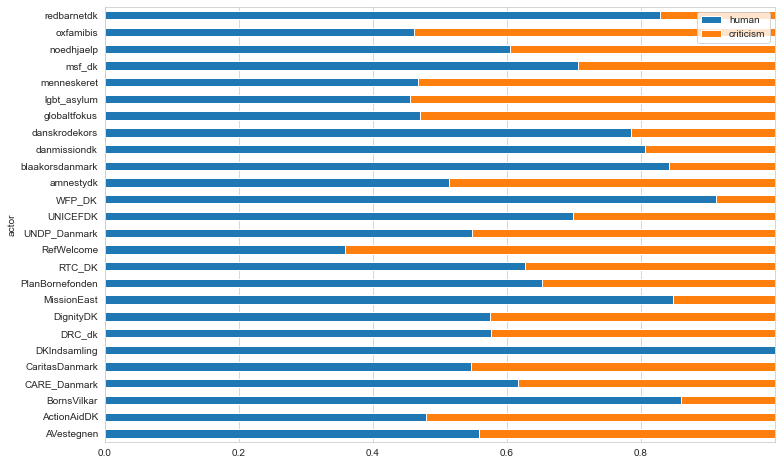

In [71]:

df = pd.DataFrame({'human': human_p,
                   'criticism': critism_p})
ax = df.plot.barh(stacked=True, figsize=(12,8))
plt.legend(loc="upper right")
plt.savefig('human_critisism_plot.png', bbox_inches='tight')

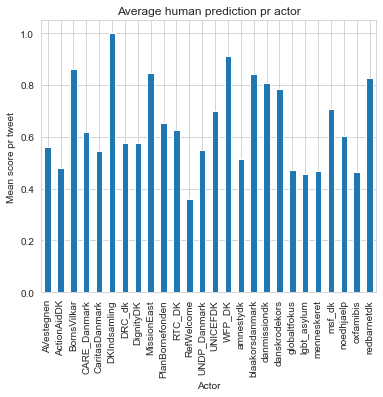

In [43]:
human_p.plot(kind='bar', title='Average human prediction pr actor', ylabel='Mean score pr tweet',
         xlabel='Actor', figsize=(6, 5))
plt.savefig('ave score of human.png',bbox_inches='tight')

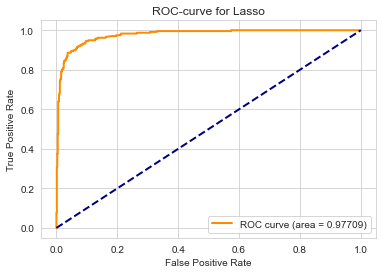

In [41]:
#Plotting the ROC-curve and AUC-score for Lasso

plt.figure()

lw = 2

plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve (area = %0.5f)' % roc_auc[1])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.title('ROC-curve for Lasso')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")

#plt.show()
plt.savefig('ROC-curve for Lasso.png')

## Coefficient from Lasso model

In [31]:
import numpy as np

In [32]:
#Getting the feature names 
feature_names = np.array(bestlasso.named_steps["vect"].get_feature_names())
feature_names.shape


(329,)

In [33]:
#Creating a dataframe with lasso coefficients (similar to above)
lasso_coefs = pd.DataFrame(np.vstack((feature_names, bestlasso.named_steps['lasso'].coef_)).T, 
                                  columns = ['feat_name', 'coef'])
#Converting column values from string type to float
lasso_coefs['coef'] = lasso_coefs['coef'].astype(float)

#Sort the features by the absolute value of their coefficient

#Creating a column for absolute values
lasso_coefs["abs_value"] = lasso_coefs["coef"].apply(lambda x: abs(x))

#Creating a column of colors, based on whether the coefficient is positive or negative 
#(This step is not necessary - just for nice visualization)
lasso_coefs["colors"] = lasso_coefs["coef"].apply(lambda x: "green" if x > 0 else "red")

#Sorting the dataframe based on the absolute value column
lasso_coefs = lasso_coefs.sort_values("abs_value", ascending=False)


In [34]:
#Viewing the top 20 most impactful coefficients
lasso_coefs[:20]

,feat_name,coef,abs_value,colors
56,demokrati,16.103151,16.103151,green
149,indsats,-14.738250,14.738250,red
17,ansvar,14.704586,14.704586,green
118,giver,-14.370944,14.370944,red
119,glad,-14.363528,14.363528,red
287,tak,-13.878446,13.878446,red
37,bruge,-13.848339,13.848339,red
275,støtte,-13.229552,13.229552,red
266,stille,-13.160146,13.160146,red
303,udsætte,13.087177,13.087177,green


In [35]:
import seaborn as sns

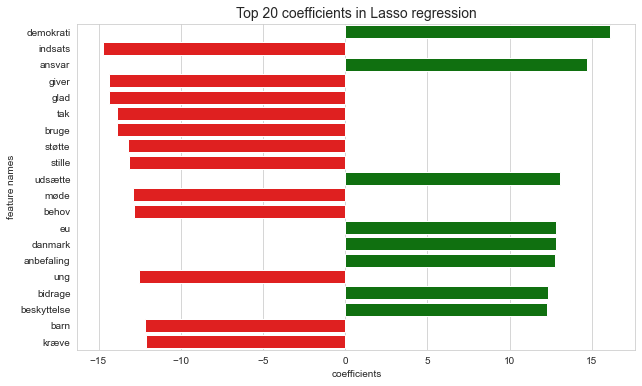

In [48]:
sns.set_style('whitegrid')

#Plotting the top 20 most impactful coefficients 
plt.figure(figsize = (10,6))

sns.barplot(x = 'coef',y = 'feat_name', data = lasso_coefs[:20], palette = lasso_coefs[:20].colors)
plt.ylabel('feature names')
plt.xlabel('coefficients')
plt.title('Top 20 coefficients in Lasso regression', fontsize = 14);

plt.savefig('top 20 coef in Lasso.png')